In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 0
b = 10
t = [10**-3, 10**-6, 10**-9]

f = lambda x: np.cos(1/(1+x))+np.sin(3*x/2)+x-7
df = lambda x: np.sin(1/(1+x))*(1/((1+x)**2))+np.cos(3*x/2)*3/2+1

In [3]:
def bisection1(f, a, b, t):
    if np.sign(f(a)) == np.sign(f(b)):
        return 'метод дихотомии неприменим'
    x = (a+b)/2
    if (b-a) < t or f(x) == 0: 
        return x
    elif np.sign(f(a)) == np.sign(f(x)):
        return bisection1(f, x, b, t)
    else:
        return bisection1(f, a, x, t)

def bisection2(f, a, b, t):
    if np.sign(f(a)) == np.sign(f(b)):
        return 'метод дихотомии неприменим'
    while (b-a) >= t:
        x = (a+b)/2
        if f(x) == 0:
            break
        if np.sign(f(a)) != np.sign(f(x)):
            b = x
        else:
            a = x   
    return x

def Newton(f, df, x, t, i):
    for k in range(i):
        if abs(f(x)) < t or f(x) == 0: 
            return x
        elif df(x) == 0:
            return None
        else:
            return Newton(f, df, x - f(x)/df(x), t, i)
    return 'метод не сошёлся за '+str(i)+' итераций'

In [4]:
for i in t:
    print('bisection1 | точность', i, '|', bisection1(f, a, b, i))
for i in t:
    print('bisection2 | точность', i, '|', bisection2(f, a, b, i))
for i in t:
    print('Newton | точность', i, '|', Newton(f, df, 5, i, 1000))

bisection1 | точность 0.001 | 5.05157470703125
bisection1 | точность 1e-06 | 5.051619708538055
bisection1 | точность 1e-09 | 5.051619448058773
bisection2 | точность 0.001 | 5.0518798828125
bisection2 | точность 1e-06 | 5.0516194105148315
bisection2 | точность 1e-09 | 5.051619448349811
Newton | точность 0.001 | 5.05161679815347
Newton | точность 1e-06 | 5.051619448197536
Newton | точность 1e-09 | 5.051619448197536


In [8]:
def Newton1(f, df, x, t, i):
    for k in range(i):
        if abs(f(x)) < t or f(x) == 0: 
            return x
        elif df(x) == 0:
            return None
        else:
            print(x)
            return Newton1(f, df, x - f(x)/df(x), t, i)
    return 'метод не сошёлся за '+str(i)+' итераций'
print('Newton | точность', 10**-6, '|', Newton1(f, df, 5, 10**-6, 1000))

5
5.049756475194272
5.05161679815347
Newton | точность 1e-06 | 5.051619448197536


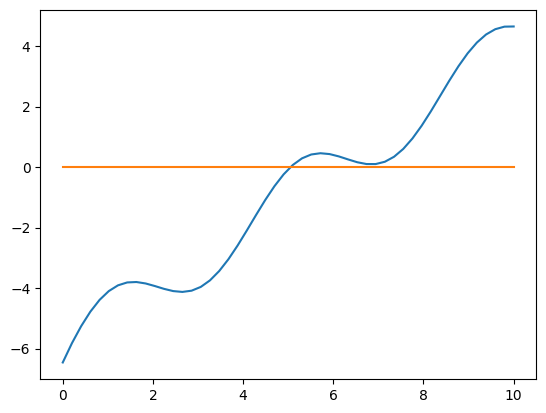

In [5]:
x = np.linspace(0, 10)
y = np.full((50, ), 0)
plt.plot(x, f(x))
plt.plot(x, y)